# Homework Set 9

### James Graham

## Exercise 6

The solution of the LQ asset pricing problem is a $\mathbf{P^*}$, $\delta^*$ which statisfy:

$$\mathbf{P^*} = \beta \mathbf{A'(D + P^*)A}$$
$$\delta^* = \frac{\beta}{1-\beta} \text{trace}(\mathbf{C' (D + P^*) C})$$

The solution exists as long as $\mathbf{A}$ satisfies the stability condition:
$$ \rho(\mathbf{A}) < \frac{1}{\sqrt{\beta}} $$

The following function checks the stability condition, and if it holds, it solves the problem by finding $\mathbf{P^*}$ using an iterative method.

In [1]:
import numpy as np
from numpy.linalg import eig
import quantecon as qe
import matplotlib.pyplot as plt


def compute_price(A,C,D,beta, tol):
    ''' 
    This function computes the price as a fixed point of the 
    asset pricing problem P = beta*A'(D+P)A using iterative methods
    INPUTS
    - A          = 
    - C          =
    - D          = 
    - beta       = Discount factor
    - tol        = Iterative procedure tolerance
    OUTPUTS
    - P_star     = Fixed point solution to the asset pricing problem
    - delta_star = 
    '''
    # check stability condition
    eigval, eigvec = eig(A)
    rho_A = np.max(np.absolute(eigval))
    
    # if condition is satisfied, compute price function
    if rho_A > 1/np.sqrt(beta):
        print('Stability condition not satisfied \n')
    else:
        n = A.shape[1]
        P_guess = np.identity(n)
        dist = 1

        # find P* iteratively
        while dist > tol:
            P_new = beta*np.transpose(A)@(D+P_guess)@A
            dist = np.sum(np.absolute(P_new - P_guess))
            P_guess = P_new

        P_star = P_guess

        # compute delta*
        delta_star = beta/(1-beta)*np.trace(np.transpose(C)@(D + P_star)@C)
    
    return P_star, delta_star

We can now use the function with the matrices described in the problem. 

In [2]:
A = np.array([[0.8, -0.1],[-0.1, 0.8]])
C = np.identity(2)
D = np.identity(2)
beta = 0.9
tol  = 1e-8

P_star, delta_star = compute_price(A, C, D, beta, tol)

print(P_star)
print(delta_star)

[[ 1.73947283 -0.95056406]
 [-0.95056406  1.73947283]]
49.3105109059


We can also compare the results with QuantEcon, which solves the problem as:

$\mathbf{P = \Lambda P \Lambda' + M}$

where $\mathbf{M} = \beta \mathbf{A'DA}$ and $\mathbf{\Lambda} = \sqrt{\beta} \mathbf{A'}$.

We can see below that we get the same answers as with the function we built above. 

In [3]:
M = beta*np.transpose(A)@D@A
la = np.sqrt(beta)*np.transpose(A)

P_star_qe = qe.solve_discrete_lyapunov(la, M)

print(P_star_qe)

[[ 1.73947283 -0.95056407]
 [-0.95056407  1.73947283]]


To compute the price at any point in the state space (an $\mathbf{x} = (x_1, x_2)$ pair) I use the pricing function:

$$p^*(\mathbf{x}) = \mathbf{x' P^* x} + \delta^*$$

In [4]:
Ngrids = 100
x1 = np.linspace(-10, 10, Ngrids)
x2 = np.linspace(-10, 10, Ngrids)
px = np.zeros([Ngrids, Ngrids])
x = np.empty([2,1]) 

print(x.shape)
for i in range(Ngrids):
    for j in range(Ngrids):
        x[0] = x1[i]
        x[1] = x2[j]
        price  = np.transpose(x)@P_star@x + delta_star
        px[i,j] = price[0]

        

        
#using PlotlyJS
#data = contour(;x=x1, y=x2, z=px, colorscale="Jet")
#l = Layout(;title="Equilibrium Pricing Function", xaxis_title="x1", yaxis_title="x2")
#p2 = plot(data, l)

(2, 1)


Finally, I reproduce the contour map below: 

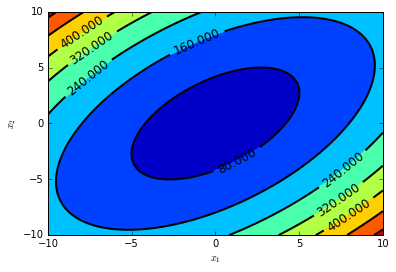

In [26]:
% matplotlib inline
# Note to self: plt.contour = contour lines; plt.contourf = filled contours 
c = plt.contour(x1,x2,px,colors='k',linewidths=2) 
plt.clabel(c, inline=1, fontsize=12)
c = plt.contourf(x1,x2,px) 
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()